13.12.16

Solve 
$$
y''+p(x)y'+q(x)y=f(x)
$$
 subject to 
$$
\left\{ \begin{aligned}\alpha_{1}y(L)+\alpha_{2}y'(L) & =A\\
\beta_{1}y(R)+\beta_{2}y'(R) & =B.
\end{aligned}
\right.
$$


Find the solution $\left\{ y_{i}\right\} =\left\{ y(x_{i})\right\} $
on the uniform grid of partition rank $n$: $x_{i}=L+ih$, $h=(R-L)/n$.
Approximate the derivatives with finite difference formulae $$y_{i}'=\frac{y_{i+1}-y_{i-1}}{2h}+o(h^{2}),\qquad y''_{i}=\frac{y_{i+1}-2y_{i}+y_{i-1}}{h^{2}}+o(h^{2})$$ to obtain
$$
\left\{ \begin{aligned}y_{0} & =\kappa_{1}y_{1}+\nu_{1}\\
a_{i}y_{i+1}-b_{i}y_{i}+c_{i}y_{i-1} & =g_{i},\quad i=1,\ldots,n-1\\
y_{n} & =\kappa_{2}y_{n-1}+\nu_{2}
\end{aligned}
\right.
$$
 where 
\begin{align*}a_{i} & =1+\frac{h}{2}p_{i} & b_{i} & =2-h^{2}q_{i} & c_{i} & =1-\frac{h}{2}p_{i} & g_{i} & =h^{2}f_{i}\end{align*} and
\begin{align*}
\kappa_{1} & =-\frac{4a_{1}\alpha_{2}-\alpha_{2}b_{1}}{2a_{1}\alpha_{1}h-3a_{1}\alpha_{2}+\alpha_{2}c_{1}} & \nu_{1} & =\frac{2Aa_{1}h+\alpha_{2}g_{0}}{2a_{1}\alpha_{1}h-3a_{1}\alpha_{2}+\alpha_{2}c_{1}}\\
\kappa_{2} & =-\frac{b_{n-1}\beta_{2}-4\beta_{2}c_{n-1}}{2\beta_{1}c_{n-1}h-a_{n-1}\beta_{2}+3\beta_{2}c_{n-1}} & \nu_{2} & =-\frac{\beta_{2}g_{n-1}}{2\beta_{1}c_{n-1}h-a_{n-1}\beta_{2}+3\beta_{2}c_{n-1}}.
\end{align*}

The former four coefficients can be computed by solving the system $$\left\{ \begin{aligned}\alpha_{1}y_{0}+\alpha_{2}y'_{0} & =A\\
a_{1}y_{2}-b_{1}y_{1}+c_{1}y_{0} & =g_{1}
\end{aligned}
\right.,\qquad y_{0}'=\frac{-3y_{0}+4y_{1}-y_{2}}{2h}+o(h^{2})$$
 (and in a similar fashion for the right side) thus obtaining the second-order approximation.

Set each $y_{i}$ to be of the form $y_{i}=u_{i}y_{i+1}+\vartheta_{i},\ i=1,\ldots,n-1$,
then express from the previous 
$$
y_{i}=\underbrace{\frac{a_{i}}{b_{i}-c_{i}u_{i-1}}}_{u_{i}}y_{i+1}+\underbrace{\frac{c_{i}\vartheta_{i-1}-g_{i}}{b_{i}-c_{i}u_{i-1}}}_{\vartheta_{i}}.
$$
Find $y_{n}$ from 
$$
\left\{ \begin{aligned}y_{n-1} & =u_{n-1}y_{n}+\vartheta_{n-1}\\
y_{n} & =\kappa_{2}y_{n-1}+\nu_{2}
\end{aligned}
\right.\implies y_{n}=\frac{\kappa_{2}\vartheta_{n-1}+\nu_{2}}{1-\kappa_{2}u_{n-1}}.
$$
 

Finally, make the *forward* run to obtain the coefficients $u_{i},\vartheta_{i}$:
$$
\left\{ \begin{aligned}u_{0} & =\kappa_{1}\\
\vartheta_{0} & =\nu_{1}\\
u_{i} & =\frac{a_{i}}{b_{i}-c_{i}u_{i-1}}\\
\vartheta_{i} & =\frac{c_{i}\vartheta_{i-1}-g_{i}}{b_{i}-c_{i}u_{i-1}}
\end{aligned}
\right.
$$
 Substitute the obtained values back in the *backward* run to
get the desired result --- $\left\{ y_{i}\right\} $. 

In [7]:
def desolve_tridiagonal_matrix(p_, q_, f_, alpha1, alpha2, beta1, beta2, A, B, n, L, R, model, verbose=False):
    h = (R - L) / n
    x = [L + h*i for i in range(n+1)]    # n+1 points

    def p(i):
        return p_(x[i])

    def q(i):
        return q_(x[i])

    def f(i):
        return f_(x[i])

    def a(i):
        return 1 + h/2 * p(i)

    def b(i):
        return 2 - h^2 * q(i)

    def c(i):
        return 1 - h/2 * p(i)

    def g(i):
        return h^2 * f(i)

    # O(h)
#     kappa1 = alpha2 / (alpha2 - h * alpha1)
#     nu1 = A / (alpha1 - alpha2 / h)
#     kappa2 = beta2 / (h * beta1 + beta2)
#     nu2 = B / (beta1 + beta2 / h)
    # O(h^2)
    kappa1 = -(4*a(1)*alpha2 - alpha2*b(1)) / (2*a(1)*alpha1*h - 3*a(1)*alpha2 + alpha2*c(1))
    nu1    =  (2*A*a(1)*h + alpha2*g(0))    / (2*a(1)*alpha1*h - 3*a(1)*alpha2 + alpha2*c(1))
    kappa2 = -(b(n-1)*beta2 - 4*beta2*c(n-1)) / (2*beta1*c(n-1)*h - a(n-1)*beta2 + 3*beta2*c(n-1))
    nu2    = -(beta2 * g(1))                  / (2*beta1*c(n-1)*h - a(n-1)*beta2 + 3*beta2*c(n-1))

    u = [kappa1.n()]
    th = [nu1.n()]
    for i in range(1, n+1):
        u.append((a(i) / (b(i) - c(i)*u[i-1])).n())
        th.append(((c(i) * th[i-1] - g(i)) / (b(i) - c(i) * u[i-1])).n())

    if verbose:
        pretty_print(table(zip(u, th), header_row=['$u$', r'$\vartheta$']))

    y = [None for _ in range(n+1)]
    y[n] = ((kappa2 * th[n-1] + nu2) / (1 - kappa2 * u[n-1])).n()
    for i in reversed(range(n)):
        y[i] = (u[i] * y[i+1] + th[i]).n()

    # print(y)

    var('w')
    if verbose:
        solution_plot = list_plot(zip(x,y))
        if model is not None:
            solution_plot += plot(model(w), 0, 1, color='red')
            show([(y[i] - model(x[i])).n() for i in range(len(x))])
        show(solution_plot)
    
    return y

### Solution for given parameters

Solve for particular 
\begin{align*}
p(x) & =1+2x & q(x) & =-\ln(1+x) & f(x) & =x-1 & \alpha & =0.5 & \beta & =0.7
\end{align*}
 and boundary conditions 
$$
\left\{ \begin{aligned}y'(0) & =\alpha y(0),\\
y'(1) & =-\beta y(1).
\end{aligned}
\right.\iff\left\{ \begin{aligned}\alpha y(0)-y'(0) & =0\\
\beta y(1)+y'(1) & =0
\end{aligned}
\right.
$$
implying $L=0,\ R=1,\ \alpha_{1}=0.5,\ \alpha_{2}=-1,\ \beta_{1}=0.7,\ \beta_{2}=1,\ A=0,\ B=0$.

In [ ]:
p(x) = 1 + 2*x
q(x) = -log(1 + x)
f(x) = x - 1
alpha1 = 0.5
alpha2 = -1
beta1 = 0.7
beta2 = 1
A = 0
B = 0
n = 100
L = 0
R = 1
y100 = desolve_tridiagonal_matrix(p, q, f, alpha1, alpha2, beta1, beta2, A, B, n, L, R, None, True)

In [ ]:
p(x) = 1 + 2*x
q(x) = -log(1 + x)
f(x) = x - 1
alpha1 = 0.5
alpha2 = -1
beta1 = 0.7
beta2 = 1
A = 0
B = 0
n = 100
L = 0
R = 1
y10 = desolve_tridiagonal_matrix(p, q, f, alpha1, alpha2, beta1, beta2, A, B, 10, L, R, None, False)
y100 = desolve_tridiagonal_matrix(p, q, f, alpha1, alpha2, beta1, beta2, A, B, n, L, R, None, False)
pretty_print(table(zip(y10, [y for (i, y) in enumerate(y100) if i%10 == 0]),
                   header_row=['$n = 10$', '$n = 100$']))

x10 = [L + (R - L) / 10*i for i in range(n+1)]
x100 = [L + (R - L) / 100*i for i in range(n+1)]
sol_plot = list_plot(zip(x10, y10), color='red')
sol_plot += list_plot(zip(x100, y100))
show(sol_plot)
y100

### Model solution for $sin(4x)$

,
,
,
,
,
,
,
,
,
,
,


[-0.00139755019709924,
 -0.00139082498619148,
 -0.00138406973588090,
 -0.00137729406505077,
 -0.00137050763711949,
 -0.00136372015014372,
 -0.00135694132673903,
 -0.00135018090382494,
 -0.00134344862220304,
 -0.00133675421597851,
 -0.00133010740183254,
 -0.00132351786815749,
 -0.00131699526406603,
 -0.00131054918828433,
 -0.00130418917794251,
 -0.00129792469727552,
 -0.00129176512624596,
 -0.00128571974910419,
 -0.00127979774290077,
 -0.00127400816596479,
 -0.00126835994636287,
 -0.00126286187035818,
 -0.00125752257088296,
 -0.00125235051604144,
 -0.00124735399766340,
 -0.00124254111992261,
 -0.00123791978804078,
 -0.00123349769709413,
 -0.00122928232094255,
 -0.00122528090129814,
 -0.00122150043695646,
 -0.00121794767320382,
 -0.00121462909142678,
 -0.00121155089893932,
 -0.00120871901904818,
 -0.00120613908137723,
 -0.00120381641247103,
 -0.00120175602669259,
 -0.00119996261744348,
 -0.00119844054871698,
 -0.00119719384700845,
 -0.00119622619360082,
 -0.00119554091724394,
 -0.00119514098724516,
 -0.00119502900698942,
 -0.00119520720790733,
 -0.00119567744390769,
 -0.00119644118628903,
 -0.00119749951914905,
 -0.00119885313530488,
 -0.00120050233273927,
 -0.00120244701158700,
 -0.00120468667167406,
 -0.00120722041062160,
 -0.00121004692252658,
 -0.00121316449722952,
 -0.00121657102017825,
 -0.00122026397289765,
 -0.00122424043406977,
 -0.00122849708123707,
 -0.00123303019312682,
 -0.00123783565260727,
 -0.00124290895027501,
 -0.00124824518867739,
 -0.00125383908717136,
 -0.00125968498741869,
 -0.00126577685951307,
 -0.00127210830874275,
 -0.00127867258297898,
 -0.00128546258068929,
 -0.00129247085956574,
 -0.00129968964576693,
 -0.00130711084375784,
 -0.00131472604674193,
 -0.00132252654767431,
 -0.00133050335084225,
 -0.00133864718400041,
 -0.00134694851104597,
 -0.00135539754521771,
 -0.00136398426280206,
 -0.00137269841732793,
 -0.00138152955423108,
 -0.00139046702596812,
 -0.00139950000755604,
 -0.00140861751252153,
 -0.00141780840922773,
 -0.00142706143756066,
 -0.00143636522594753,
 -0.00144570830868096,
 -0.00145507914352244,
 -0.00146446612955659,
 -0.00147385762526864,
 -0.00148324196681571,
 -0.00149260748646041,
 -0.00150194253114000,
 -0.00151123548113485,
 -0.00152047476881134,
 -0.00152964889740181,
 -0.00153874645979091,
 -0.00154775615727809,
 -0.00155666681828115]

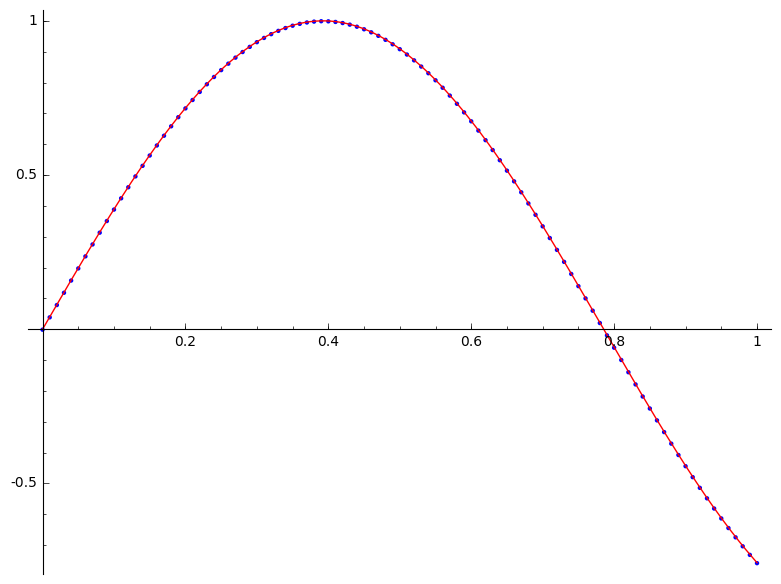

[-0.00139755019709924,
 0.0385985092004427,
 0.0785306242332918,
 0.118334913223869,
 0.157947698977126,
 0.197305610644918,
 0.236345685100396,
 0.275005467660289,
 0.313223111993915,
 0.350937479059111,
 0.388088234906818,
 0.424615947197842,
 0.460462180277417,
 0.495569588655452,
 0.529882008742941,
 0.563344548697760,
 0.595903676236146,
 0.627507304269364,
 0.658104874228572,
 0.687647436944587,
 0.716087730953160,
 0.743380258100501,
 0.769481356328086,
 0.794349269520325,
 0.817944214303335,
 0.840228443687974,
 0.861166307455298,
 0.880724309187853,
 0.898871159855563,
 0.915577827870469,
 0.930817585530270,
 0.944566051776335,
 0.956801231197798,
 0.967503549219326,
 0.976655883416268,
 0.984243590907083,
 0.990254531779215,
 0.994679088510947,
 0.997510181358140,
 0.998743279681249,
 0.998376409194497,
 0.996410155125573,
 0.992847661280832,
 0.987694625017456,
 0.980959288130629,
 0.972652423670288,
 0.962787318708540,
 0.951379753085306,
 0.938447974166176,
 0.924012667652

In [8]:
p(x) = 1 + 2*x
q(x) = -log(1 + x)
f(x) = -16*sin(4*x) + (4+8*x)*cos(4*x) - log(1+x)*sin(4*x)
model(x) = sin(4*x)
alpha1 = 0
alpha2 = 1/4
beta1 = -4*cos(4)/sin(4)
beta2 = 1
A = 1
B = 0
n = 100
L = 0
R = 1
y = desolve_tridiagonal_matrix(p, q, f, alpha1, alpha2, beta1, beta2, A, B, n, L, R, model, True)
y

In [ ]:
var('alpha1, y0, alpha2, y1, y2, h, A, c1, b1, a1, g0, g1, beta1, beta2')
sol1 = solve(alpha1*y0 + alpha2*((-3*y0+4*y1-((g0-c1*y0+b1*y1)/a1))/(2*h)) == A, y0)[0]
sol2 = solve(beta1*y0 + beta2*((3*y0 - 4*y1 + (1/c1 * (g1 - a1*y0 + b1*y1)))/(2*h)) == B, y0)[0]
show(sol1.rhs().collect(y1))
show(sol2.rhs().collect(y1))